# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 11 (Thursday) 11:00 pm </b> </font>

<font color="blue"> FRENY SAVALIA</font>

# I. Introduction

The objective of this assignment is to study and implement various algorithms for classification of a dataset using python.
The classification type used in this assignment is Linear Classification. We will implement 4 types of classifying algorithms viz. Pocket Algorithm, Linear Dicriminant Analysis(LDA), Quadratic Discriminant Analysis(QDA) and Logistic Regression.

We will build a prediction model to predict the annual income of a person using the Census dataset.

# II. Data

The dataset used is the Census dataset.

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) The Census Income dataset can assist in the prediction task of determining whether a person makes over 50K a year. It can also help in various other census analysis using the attributes of the dataset.

Due to the variety of data included in the dataset, we are going to use it for classification and prediction.


In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import abc
from abc import ABC, abstractmethod
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

C:\Users\Freny Savalia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [91]:
data_columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                    'sex','capital-gain','capital-loss','hours-per-week','native-country','annual-income']
census_data=pd.read_csv("census.data",names=data_columns)
census_data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country annual-income  
0          2174             0              40   United-States         <=50K  
1             0             0              13   United-States         <=50K  
2             0             0              40   United-States         <=50K  
3             0             0              40   United-States         <=50K  
4             0             0              40            Cuba         <=50K

The above table represents the first few rows of the dataset.

The columns in the above data can be interpreted as follows:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- annual income: <=50K, >50K
    

In [9]:
census_data.shape

(32561, 15)

In [10]:
census_data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
annual-income     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
def make_pivot (param1, param2):
    census_data_slice = census_data[[param1, param2, 'fnlwgt']]
    slice_pivot = census_data_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart


fnlwgt      
annual-income  <=50K  >50K
sex                       
 Female         9592  1179
 Male          15128  6662

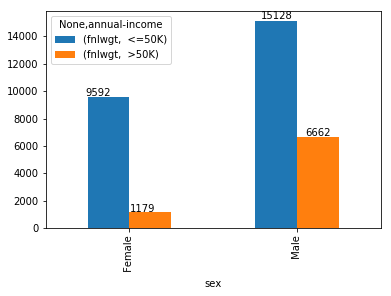

In [13]:
make_pivot ('sex','annual-income')

fnlwgt                                                          \
education   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm   
sex                                                                        
 Female      295   432   144       46       84      160  144         421   
 Male        638   743   289      122      249      486  370         646   

                                                                         \
education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool   
sex                                                                       
 Female          500       1619         86     3390      536         16   
 Male            882       3736        327     7111     1187         35   

                                      
education  Prof-school  Some-college  
sex                                   
 Female             92          2806  
 Male              484          4485

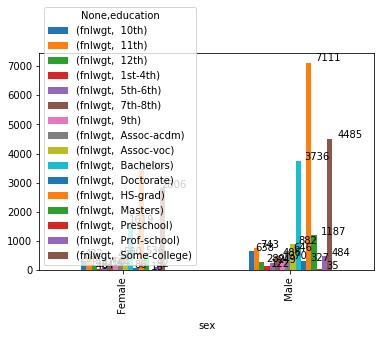

In [14]:
make_pivot ('sex','education')

fnlwgt                                         
race     Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
sex                                                                 
 Female                 119                 346   1555    109   8642
 Male                   192                 693   1569    162  19174

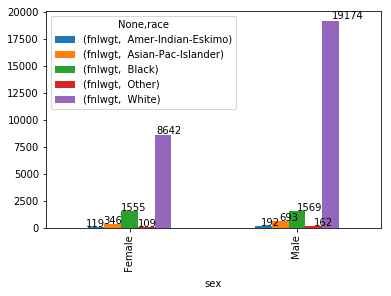

In [15]:
make_pivot ('sex','race')

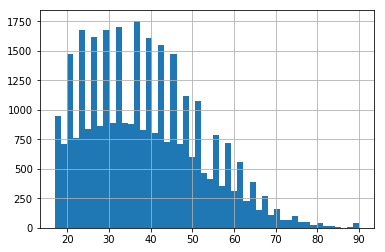

In [16]:
census_data['age'].hist(bins=50)

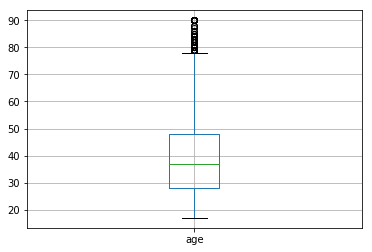

In [17]:
census_data.boxplot(column='age')

fnlwgt                                         
race           Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
annual-income                                                             
 <=50K                        275                 763   2737    246  20699
 >50K                          36                 276    387     25   7117

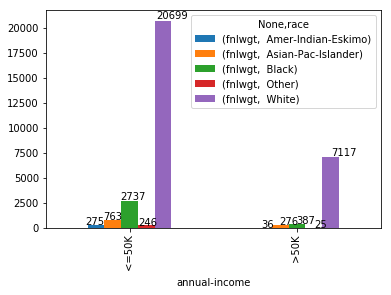

In [18]:
make_pivot ("annual-income","race")


C:\Users\Freny Savalia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


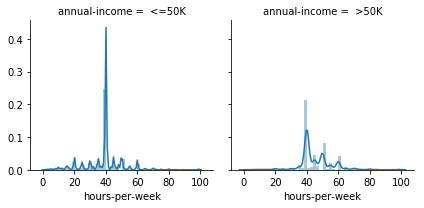

In [19]:
g = sns.FacetGrid(census_data, col="annual-income")
g = g.map(sns.distplot, "hours-per-week")

The observations made by performing data visualization of Census dataset are as follows:

    The histogram shows that people between age 40-45 have majorly participated in the census.
    The majority of people who participated in census work upto 60 hours per week.

The census dataset has many categorical columns. So we will encode the data using the sklearn label encoder to obtain numerical values.


In [95]:
categorical_columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','annual-income']

encoder=LabelEncoder()
for column in categorical_columns:
    encoder.fit(census_data[column])
    census_data[column]=encoder.transform(census_data[column])

In [96]:
attr_count=census_data.shape[1]
X=census_data.iloc[:,0:attr_count-1]
Y=census_data.iloc[:,attr_count-1]

X_train, X_test, Y_train, Y_test = train_test_split(X[:400], Y[:400], test_size=0.33, random_state=42)


Y_train=Y_train.values.reshape(-1,1)
Y_test=Y_test.values.reshape(-1,1)

X_train=np.array(X_train)
X_test=np.array(X_test)

In [97]:
X.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  
0              40              39  
1              13              39  
2              40              39  
3              40              39  
4              40               5

# III. Method


### A. Super Classs Definition

In [40]:
import numpy as np
import abc

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In [41]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)

    cfm = df(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

def get_evaluation_metrics(T,Y):
    accuracy=np.sum(T==Y)/T.shape[0]
    tp=np.sum((T == Y) & (T== 0))
    tn=np.sum((T == Y) & (T== 1))
    fp=np.sum((T != Y) & (T== 0))
    fn=np.sum((T != Y) & (T== 1))
    
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(tn+fp)
    F1=2*precision*recall/(precision+recall)
    
    denominator=np.multiply((tp+fp),(tp+fn),dtype=np.float64)
    denominator=np.multiply(denominator,(tn+fp))
    denominator=np.multiply(denominator,(tn+fn))
    MCC=(tp*tn-fp*fn)/np.sqrt(denominator)
    
    return accuracy,precision,recall,specificity,F1,MCC

### B. Pocket Algorithm

The pocket algorithm solves the stability problem of perceptron learning by keeping the best solution seen so far "in its pocket" i.e storing the best solution and comparing it with the new solution for every iteration. The pocket algorithm then returns the solution in the pocket, rather than the last solution.


train:This is the method where the model is trained using the pocket algorithm. It initializes the weights and then normlalizes the dataset by calling the normalize method, and then it iterates the dataset one row at a time to predict the target. If the actual target is different than the predicted target then the weight is updated. In addition, the model stores the best weight (which makes minimium error on predicting the targets of the training dataset) found in all the iterations for each data point and keeps it as the trained weight.

test:This is the method where the model normalizes the train data using the mean and standard deviation of the training data and then uses the trained weight to predict the target for the test data.

compare:This methods compares the two weights in terms of the better prediction.


### Building a PocketModel:

In [42]:
class PocketModel(Classifier): 
    """ 
        PocketModel class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        self.w=None
        Classifier.__init__(self)
        
    def compare(self, X, T, w1, w2):
        y = np.sign(X @ w1)
        yp = np.sign(X @ w2)
        
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T, maxiter,alpha):
        
        X=self.normalize(X)
        w = np.random.randn(X.shape[1],1)
        w_pocket = w.copy()
        N=T.shape[0]
        
        for i in range(maxiter):
            converged = False
            for k in range(N):
                h=np.dot(X[k],w)
                if(h>0):
                    pred_t=1
                else:
                    pred_t=-1
                    
                if(T[k]!=pred_t):
                    w=w+alpha*T[k]*(X[k,:].reshape(-1,1))
                    
                if(self.compare(X,T,w,w_pocket)==1):
                    w_pocket=w
                    
            if(i%10==4):
                 print("Iteration ",(i+1))      
        self.w=w_pocket
        
    def use(self, X):
        X=(X-self.meanX)/self.stdX
        h=X@self.w
        h[h<=0]=0
        h[h>0]=1
        return h.astype(int)

### Experimenting the model on our data:

In [125]:
np.random.seed(1717)

bias=np.ones((X_train.shape[0],1))
X_train_biases=np.concatenate((bias,X_train),axis=1)


train_transformed=Y_train.copy()
train_transformed[train_transformed==0]=-1

pocketModel=PocketModel()
maxiter=50
alpha=10
pocketModel.train(X_train_biases,Y_train,maxiter,alpha)

C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sign
  from ipykernel import kernelapp as app
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sign
  app.launch_new_instance()


Iteration  5
Iteration  15
Iteration  25
Iteration  35
Iteration  45


### Evaluation metrics:

In [131]:
bias=np.ones((X_test.shape[0],1))
test_x_biases=np.concatenate((bias,X_test),axis=1)
t_pocket=pocketModel.use(X_test_biases)
accuracy,precision,recall,specificity, F1,MCC=get_evaluation_metrics(Y_test[:625],t_pocket)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("Specificity",specificity)
print("F1",F1)
print("MCC",MCC)

Accuracy 0.0
Precision nan
Recall 0.0
Specificity nan
F1 nan
MCC nan


C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [128]:
indices=np.argsort(Y_test.reshape(-1))
sorted_Y_test=Y_test[indices]
sorted_t=t_pocket[indices]

## Visualization of the result:

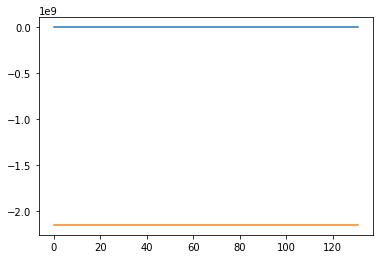

In [129]:
plt.plot(sorted_Y_test)
plt.plot(t_pocket)

### C. QDA

Quadratic discriminant analysis (QDA) is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements from each class are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical. When the normality assumption is true, the best possible test for the hypothesis that a given measurement is from a given class is the likelihood ratio test. Suppose there are only two groups, (so $${\displaystyle y\in \{0,1\}}  y \in \{0,1 \} $$), and the means of each class are defined to be {\displaystyle \mu _{y=0},\mu _{y=1}}  \mu_{y=0},\mu_{y=1}  and the covariances are defined as $${\displaystyle \Sigma _{y=0},\Sigma _{y=1}}  \Sigma_{y=0}, \Sigma_{y=1} $$. Then the likelihood ratio will be given by

Likelihood ratio = $${\displaystyle {\frac {{\sqrt {|2\pi \Sigma _{y=1}|}}^{-1}\exp \left(-{\frac {1}{2}}(x-\mu _{y=1})^{T}\Sigma _{y=1}^{-1}(x-\mu _{y=1})\right)}{{\sqrt {|2\pi \Sigma _{y=0}|}}^{-1}\exp \left(-{\frac {1}{2}}(x-\mu _{y=0})^{T}\Sigma _{y=0}^{-1}(x-\mu _{y=0})\right)}}<t} {\displaystyle {\frac {{\sqrt {|2\pi \Sigma _{y=1}|}}^{-1}\exp \left(-{\frac {1}{2}}(x-\mu _{y=1})^{T}\Sigma _{y=1}^{-1}(x-\mu _{y=1})\right)}{{\sqrt {|2\pi \Sigma _{y=0}|}}^{-1}\exp \left(-{\frac {1}{2}}(x-\mu _{y=0})^{T}\Sigma _{y=0}^{-1}(x-\mu _{y=0})\right)}}<t}$$
$$ for some threshold t $$. After some rearrangement, it can be shown that the resulting separating surface between the classes is a quadratic. The sample estimates of the mean vector and variance-covariance matrices will substitute the population quantities in this formula.

train:This is the method where the training data is normalized and the mean, covaraince and prior is computed for each type of class label.

test:This is the method where the model normalizes the train data using the mean and standard deviation of the training data and then compute the discriminant and returns the predicted classes based on the higher likelihood.

discrimant:This methods computes the discriminant function for the given data using QDA.

### Building the QDA model:


In [144]:
# QDA Class for classification using QDA algorithm
class QDA(Classifier): 
    """ 
        QDA class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        self.mu=None
        self.sigma=None
        self.prior=None
        self.classes=None
        Classifier.__init__(self)
        
    def compute_discriminant(self, X, mu, sigma, prior):
        mu=mu.reshape(1,mu.shape[0])
        delta=np.zeros((X.shape[0],1))
        
        for f in range(X.shape[0]): 
            t1=-1/2*np.log(np.linalg.det(sigma))
            t2=-1/2*np.dot(np.dot((X[f,:]-mu),np.linalg.inv(sigma)),(X[f,:]-mu).T)
            t3=np.log(prior) 
            delta[f]=t1+t2+t3
        return delta
    
    def train(self,X,T):
        X=self.normalize(X)
        self.classes=np.unique(T)
        self.mu=np.zeros((len(self.classes),X.shape[1]))
        self.sigma=np.zeros((len(self.classes),X.shape[1],X.shape[1]))
        self.prior=np.zeros((len(self.classes),1))
        
        for f in range(len(self.classes)):
            self.mu[f] = np.mean(X[np.where(T==self.classes[f]),:][0], 0)
            self.sigma[f] = np.cov(X[np.where(T==self.classes[f]),:][0].T)
            self.prior[f] =X[np.where(T==self.classes[f]),:][0].shape[0]/X.shape[0]


    def use(self, X):
        X=(X-self.meanX)/self.stdX
        no_of_classes=len(self.classes)
        d=np.zeros((X.shape[0],0))
        for f in range(no_of_classes):
            delta=self.compute_discriminant(X, self.mu[f], self.sigma[f], self.prior[f])
            d= np.concatenate((d,delta),axis=1)
        return d

### Experimenting the model on our dataset:

In [145]:
qda=QDA()
qda.train(X_train,Y_train)
d=qda.use(X_test[:625])

### Evaluation metrics:

In [146]:
pred_t=np.argmax(d.T,axis=0).reshape(-1,1)
accuracy,precision,recall,specificity, F1,MCC=get_evaluation_metrics(Y_test[:625],pred_t)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("Specificity",specificity)
print("F1",F1)
print("MCC",MCC)

Accuracy 0.19696969696969696
Precision nan
Recall 0.0
Specificity 1.0
F1 nan
MCC nan


C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


### Visualization of the result:


Text(0.5,0,'QDA P(x|Class=k)\n from disc funcs')

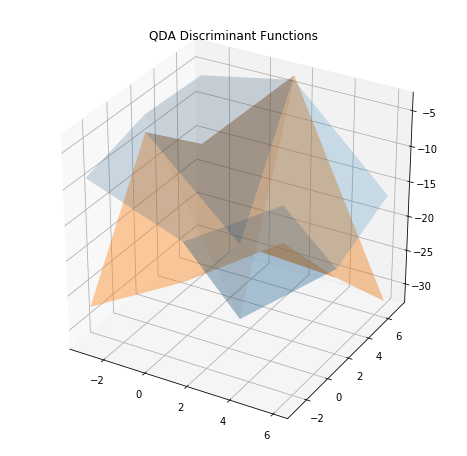

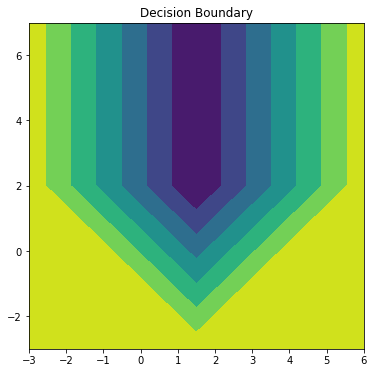

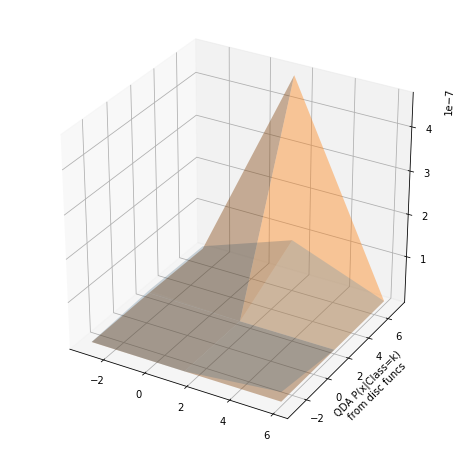

In [143]:
data_lim=3
xs, ys = np.meshgrid(np.linspace(-3,6, data_lim), np.linspace(-3,7,data_lim))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

d=d[0:data_lim**2,:]

ax.plot_surface(xs, ys, d[:,0].reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d[:,1].reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d[:,0]-d[:,1] > 0).reshape(xs.shape))
plt.title("Decision Boundary")


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d[:,0].reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[0]))
prob2 = np.exp( d[:,1].reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### D. LDA

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

LDA is also closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data. LDA explicitly attempts to model the difference between the classes of data. PCA on the other hand does not take into account any difference in class, and factor analysis builds the feature combinations based on differences rather than similarities. Discriminant analysis is also different from factor analysis in that it is not an interdependence technique: a distinction between independent variables and dependent variables (also called criterion variables) must be made.

LDA works when the measurements made on independent variables for each observation are continuous quantities. When dealing with categorical independent variables, the equivalent technique is discriminant correspondence analysis.

The LDA algorithm uses Bayes Rule for classification. For given data, we assume the target $T$ is discrete. 
For instance, if we have an input $X$, and what we want to know is the probability of each classification given the data, thus 

$$
  P(T = k \mid X = x_i)   \quad\text{for class label } k
$$

Using the Bayes Rule, 

$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\ 
    \\
\end{align*}
$$
From the above formula, P(X=x_i) is the probability of the class of a random input being k – prior to even looking at what the input is. Thats why its called the priori probability. During the training stage itself, it is computed as the fraction of the training samples that belonged to class k. This number is independent of the what x is, and reflects the trends seen in the training set.
Considering this part of Bayes Rule,P(X = x_i \ T = k) P(T=k) which is equivalent to- Given that a random data point(not necessarily in the training data) was being selected from class k, what would be the likelihood that it looked like x? To quantify this likelihood, LDA uses a Multivariate Gaussian Distribution model for each class.
$$
P(T = k \mid ) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (- \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} ( - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
$$
From the above likelihood formula, mu denotes the approximate average position,Sigma summarizes the shape of the distribution of data points.


train:This is the method where the training data is normalized and the mean and prior is computed foreach type of class labels along with the covaraince of the entire dataset. 

test:This is the method where the model normalizes the train data using the mean and standard deviation of the training data and then compute the discriminant and returns the predicted classes based on the higher likelihood.

discrimant:This methods computes the discriminant function for the given data using LDA.

### Building the LDA model:


In [149]:
# LDA Class for classification using LDA algorith
class LDA(Classifier): 
    """ 
        QDA class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        self.mu=None
        self.sigma=None
        self.prior=None
        self.classes=None
        Classifier.__init__(self)
        
    def compute_discriminant(self, X, mu, sigma, prior):
        mu=mu.reshape(1,mu.shape[0])
        delta=np.zeros((X.shape[0],1))
        
        for f in range(X.shape[0]): 
            p0=np.dot(X[f],np.linalg.inv(sigma)).reshape(1,X.shape[1])
            p1=np.dot(p0,mu.T)
            p2=-1/2*np.dot(np.dot(mu,np.linalg.inv(sigma)),mu.T)
            delta[f]=p1+p2+np.log(prior)
        return delta
    
   
    def train(self,X,T):
        X=self.normalize(X)
        self.classes=np.unique(T)
        self.mu=np.zeros((len(self.classes),X.shape[1]))
        self.sigma=np.zeros((len(self.classes),X.shape[1],X.shape[1]))
        self.prior=np.zeros((len(self.classes),1))
        
        for f in range(len(self.classes)):
            self.mu[f] = np.mean(X[np.where(T==self.classes[f]),:][0], 0)
            self.sigma[f] = np.cov(X[np.where(T==self.classes[f]),:][0].T)
            self.prior[f] =X[np.where(T==self.classes[f]),:][0].shape[0]/X.shape[0]


    def use(self, X):
        X=(X-self.meanX)/self.stdX
        no_of_classes=len(self.classes)
        d=np.zeros((X.shape[0],0))
        for f in range(no_of_classes):
            delta=self.compute_discriminant(X, self.mu[f], self.sigma[f], self.prior[f])
            d= np.concatenate((d,delta),axis=1)
        
        return d

### Experimenting the model on our dataset:

In [112]:
lda=LDA()
lda.train(X_train,Y_train)
d=lda.use(X_train)

### Visualization of the result:


Text(0.5,0,'LDA P(x|Class=k)\n from disc funcs')

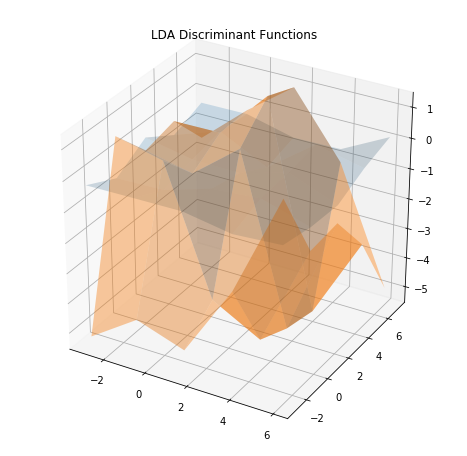

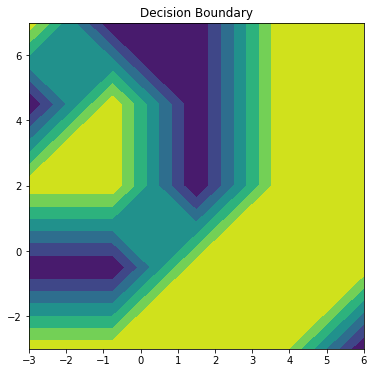

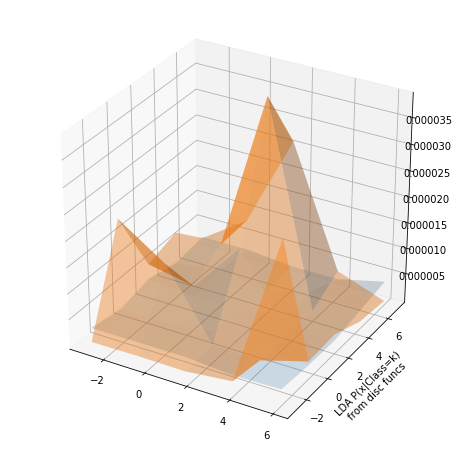

In [110]:
data_lim=5
xs, ys = np.meshgrid(np.linspace(-3,6, data_lim), np.linspace(-3,7,data_lim))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

d=d[0:data_lim**2,:]

ax.plot_surface(xs, ys, d[:,0].reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d[:,1].reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d[:,0]-d[:,1] > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d[:,0].reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[0]))
prob2 = np.exp( d[:,1].reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")

### Evaluation metrics:

In [113]:
pred_t=np.argmax(d.T,axis=0)
pred_t=np.argmax(d.T,axis=0).reshape(-1,1)
accuracy,precision,recall,specificity, F1,MCC=get_evaluation_metrics(Y_train,pred_t)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("Specificity",specificity)
print("F1",F1)
print("MCC",MCC)

Accuracy 0.7014925373134329
Precision 0.765
Recall 0.8225806451612904
Specificity 0.4268292682926829
F1 0.7927461139896372
MCC 0.26412387228384765


### E. Logistic Regression

Logistic Regression is a classification method that models the probability of an observation belonging to one of two classes. As such, normally logistic regression is demonstrated with binary classification problem (2 classes).

Logistic regression is an alternative to Linear discriminant analysis.If the assumptions of linear discriminant analysis hold, the conditioning can be reversed to produce logistic regression. The converse is not true, however, because logistic regression does not require the multivariate normal assumption of discriminant analysis.


In [150]:
# LogisticRegression Class for classification using Gradient Descent algorithm
class LogisticRegression(Classifier): 
    """ 
        QDA class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        self.w=None
        Classifier.__init__(self)
        
    def softmax(self, X, w):
        y=np.dot(X,w)
        g=np.exp(y)/np.sum(np.exp(y),axis=0)
        
        print(g.shape)
        return g
    
    def train(self,X,T,maxiter,alpha):
        X=self.normalize(X)
        self.classes=np.unique(T)
        self.w=np.random.randn(X.shape[1],len(self.classes))
        for i in range(maxiter):
            pred_t=self.softmax(X,self.w)
            likelihood=np.sum(np.sum(T*np.log(pred_t)))
            gradient=X.T@(T-pred_t)
            self.w=self.w+alpha*gradient

    def use(self, X):
        X=(X-self.meanX)/self.stdX
        h=X@self.w
        h[h<=0]=-1
        h[h>0]=1
        return h.astype(int)

### Experimenting the model on our dataset:

In [132]:
one_hot_encoder=OneHotEncoder()
Y_train=Y_train.reshape(-1,1)
one_hot_encoder.fit(Y_train)
T_binary=one_hot_encoder.transform(Y_train).toarray()

lr_model=LogisticRegression()
lr_model.train(X_train_biases,T_binary,10,0.1)


(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)
(268, 2)


C:\Users\Freny Savalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


### Visualization of the result:

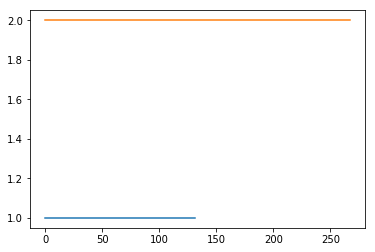

In [133]:
Xl = np.argmax(X_train, 1)
Y_test=np.where(Y_test==-1,0,1)

plt.plot(np.sort(Y_test,0))
plt.plot(np.sort(Xl,0))
plt.show()

### Evaluation metrics:

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train.ravel())
y=model.predict(X_train)
accuracy_score(Y_train,y)

0.746268656716418

## Difference

The difference between the above mentioned algorithms is a bias-variance trade-off. 
With p predictors, estimating a covariance matrix requires estimating p(p+1)/2 parameters. 
The QDA estimates a separate covariance matrix for each class, so as the higher number of predictors, we experience a computational expense. Conversely, if we assume a common covariance matrix, we only have to do the computation once. 
In general, LDA tends to be better than QDA if there are relatively few training observations, so therefore reducing variance is crucial. QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern.
Between Logistic regression, LDA and QDA, the factors to take into consideration are the type of decision boundary that is required. If highly linear, than LDA and Logistic regression may be better, if non-linear, then QDA. 



### Discussion on Accuracies:

For our chosen dataset, following are the accuracies given by the algorithms:

    Pocket-0
    QDA-19.6%
    LDA-70%
    Logistic Regression-74%

Thus we can infer that Logistic Regression is the best for our dataset.


## Comparison

Logistic Regression is a good linear classification algorithm. but it has cartain limitations as below:

1. Two-Class Problems: 
Logistic regression is intended for binary classification problems. Although, It can be extended for multi-class classification, but we have other better algorithm for that.
2. It is Unstable With Separated Classes. 
Logistic regression can become unstable when the classes are well separated.
3. It is unstable when there are few examples from which to estimate the parameters.

LDA is a linear method for multi-class classification problems. Even with binary-classification problems, it is a good idea to try both logistic regression and linear discriminant analysis.

As the number of predictors becomes high, we can experience a computational expense with QDA. 
but, in general, LDA tends to be better than QDA if there are relatively few training observations, so therefore reducing variance is crucial. QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern.

Between Logistic regression, LDA and QDA, we need to consider the following:
1. The type of decision boundary that is required. 
If highly linear, than LDA and Logistic may be better else if non-linear, go with QDA. 

The pocket algorithm is also supervised learning algorithm and is used for binary classification. Thus, can be used effectively if we have two classes of outputs. They can work only on linearly seperable datasets as being a linear classification algorithm.

# Conclusions

For our chosen dataset, the Logistic Regression model gives the best accuracy when compared with LDA, QDA and Pocket algorithm.

I found the translation of mathematical models into python code a little difficult.

# References

The references for this assignment are as follows:

1. UCI Machine Learning Repository website.
2. Stackoverflow website.
3. Youtube videos and online tutorials.
4. Kaggle
5. Wikipedia

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)